# Συστάδες και Δένδρα


* Περιλαμβάνει προσαρμοσμένο υλικό από το  *An Introduction to Statistical Learning: with Applications in R* των Gareth James, Daniela Witten, Trevor Hastie,  and Robert Tibshirani, Springer, 2013.

---

> Πάνος Λουρίδας, Αναπληρωτής Καθηγητής <br />
> Τμήμα Διοικητικής Επιστήμης και Τεχνολογίας <br />
> Οικονομικό Πανεπιστήμιο Αθηνών <br />
> louridas@aueb.gr

* Ένας εναλλακτικός τρόπος να συσταδοποιήσουμε τα δεδομένα μας είναι ακολουθώντας μια προσέγγιση από κάτω προς τα πάνω.

* Ξεκινάμε φτιάχνοντας μία συστάδα για κάθε δείγμα των δεδομένων μας.

* Στη συνέχεια συνδυάζουμε (ενώνουμε) τις συστάδες φτιάχνοντας μεγαλύτερες συστάδες.

* Με τον τρόπο αυτό φτιάχνουμε μια ιεραρχία συστάδων. Η προσέγγιση ονομάζεται *ιεραρχική συσταδοποίηση* (hierarchical clustering) ή *προσθετική συσταδοποίηση* (agglomerative clustering).

* Οι συστάδες συνδυάζονται ανά ζεύγη, βρίσκοντας κάθε φορά ένα ζευγάρι συστάδων που είναι κοντύτερα μεταξύ τους σύμφωνα με κάποια μετρική.

* Ένα πλεονέκτημα της ιεραρχικής συσταδοποίησης είναι ότι δεν χρειάζεται να αποφασίσουμε από την αρχή για τον αριθμό των συστάδων.

* Για να δούμε την ιεραρχική συσταδοποίηση εν δράση, θα χρησιμοποιήσουμε τα γονιδιακά δεδομένα NCI60.

* Αυτά περιέχουν μετρήσεις από 6.830 γονίδια σε 64 καλλιέργιες καρκινικών κυττάρων.

* Κάθε καλλιέργια έχει το όνομα του είδους καρκίνου που αφορά, στη στήλη `labs`.

* Τα δεδομένα είναι διαθέσιμα μέσω του προγράμματος R.

In [1]:
import statsmodels.api as sm

nci = sm.datasets.get_rdataset(dataname='NCI60', package='ISLR')
nci_df = nci.data
nci_df

,data.1,data.2,data.3,data.4,data.5,data.6,data.7,data.8,data.9,data.10,...,data.6822,data.6823,data.6824,data.6825,data.6826,data.6827,data.6828,data.6829,data.6830,labs
rownames,,,,,,,,,,,,,,,,,,,,,
V1,0.300000,1.180000,0.550000,1.140000,-0.265000,-7.000000e-02,0.350000,-0.315000,-0.450000,-0.654980,...,0.000000,0.030000,-0.175000,0.629981,-0.030000,0.000000,0.280000,-0.340000,-1.930000,CNS
V2,0.679961,1.289961,0.169961,0.379961,0.464961,5.799610e-01,0.699961,0.724961,-0.040039,-0.285019,...,-0.300039,-0.250039,-0.535039,0.109941,-0.860039,-1.250049,-0.770039,-0.390039,-2.000039,CNS
V3,0.940000,-0.040000,-0.170000,-0.040000,-0.605000,0.000000e+00,0.090000,0.645000,0.430000,0.475019,...,0.120000,-0.740000,-0.595000,-0.270020,-0.150000,0.000000,-0.120000,-0.410000,0.000000,CNS
V4,0.280000,-0.310000,0.680000,-0.810000,0.625000,-1.387779e-17,0.170000,0.245000,0.020000,0.095019,...,-0.110000,-0.160000,0.095000,-0.350019,-0.300000,-1.150010,1.090000,-0.260000,-1.100000,RENAL
V5,0.485000,-0.465000,0.395000,0.905000,0.200000,-5.000000e-03,0.085000,0.110000,0.235000,1.490019,...,-0.775000,-0.515000,-0.320000,0.634980,0.605000,0.000000,0.745000,0.425000,0.145000,BREAST
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
V60,-0.030000,-0.480000,0.070000,-0.700000,-0.195000,4.100000e-01,-0.240000,0.105000,-0.410000,0.875019,...,0.150000,-0.430000,0.145000,-0.090020,-0.020000,-1.390010,-1.150000,0.290000,1.190000,MELANOMA
V61,-0.270000,0.630000,-0.100000,1.100000,1.045000,8.000000e-02,-0.090000,-0.675000,-0.310000,0.275019,...,0.200000,0.290000,-0.035000,0.279981,-0.160000,-0.020010,-0.640000,-0.370000,-0.430000,MELANOMA
V62,0.210000,-0.620000,-0.150000,-1.330000,0.045000,-4.000000e-01,-0.390000,-0.675000,-0.360000,0.945020,...,-0.120000,0.850000,-0.125000,0.779980,0.390000,0.000000,0.160000,2.030000,3.940000,MELANOMA


* Για να δούμε πόσες καλλιέργειες αντιστοιχούν σε κάθε είδος καρκίνου.

In [2]:
labs_vc = nci_df['labs'].value_counts()
print(labs_vc.shape[0])
labs_vc

14


labs
RENAL          9
NSCLC          9
MELANOMA       8
BREAST         7
COLON          7
OVARIAN        6
LEUKEMIA       6
CNS            5
PROSTATE       2
UNKNOWN        1
K562B-repro    1
K562A-repro    1
MCF7A-repro    1
MCF7D-repro    1
Name: count, dtype: int64

* Θα χρησιμοποιήσουμε τον `StandardScaler()` (αν και ενδέχεται να μην χρειάζεται για τέτοιου είδους δεδομένα, αλλά τέλος πάντων).

In [3]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
nci_scaled = scaler.fit_transform(nci_df.iloc[:, :-1])
nci_scaled.shape

(64, 6830)

* Για να πάρουμε μια πρώτη ιδέα του κατά πόσο έχει νόημα η συσταδοποίηση, θα τα προβάλουμε σε λιγότερες διαστάσεις, ώστε να διαπιστώσουμε οπτικά τουλάχιστον αν εμφανίζονται συστάδες.

* Για το σκοπό αυτό θα χρησιμοποιήσουμε PCA.

In [4]:
from sklearn.decomposition import PCA

pca = PCA()
X = pca.fit_transform(nci_scaled)
print(X.shape)
pca.explained_variance_ratio_

(64, 64)


array([1.13589419e-01, 6.75620253e-02, 5.75184223e-02, 4.24755448e-02,
       3.73497235e-02, 3.61863019e-02, 3.06622240e-02, 2.68590309e-02,
       2.52949807e-02, 2.37586884e-02, 2.35655815e-02, 2.16412198e-02,
       2.04909747e-02, 1.97881793e-02, 1.91541737e-02, 1.77176082e-02,
       1.66272971e-02, 1.61075898e-02, 1.59433320e-02, 1.55991861e-02,
       1.50721674e-02, 1.48009892e-02, 1.43576234e-02, 1.36277104e-02,
       1.32350200e-02, 1.27519917e-02, 1.25903703e-02, 1.20979413e-02,
       1.18098781e-02, 1.12098170e-02, 1.08277440e-02, 1.04477523e-02,
       1.02647051e-02, 9.88274535e-03, 9.74257138e-03, 9.31114503e-03,
       9.14795316e-03, 8.95640894e-03, 8.72950586e-03, 8.42575751e-03,
       8.13979814e-03, 7.89749805e-03, 7.39000998e-03, 7.20101586e-03,
       7.08918353e-03, 6.90272334e-03, 6.78495251e-03, 6.47012955e-03,
       6.40883777e-03, 6.01193511e-03, 5.66418607e-03, 5.63402788e-03,
       5.38935217e-03, 5.12786334e-03, 5.11796180e-03, 4.81620125e-03,
      

* Αν χρησιμοποιήσουμε τις τρεις πρώτες συνιστώσες, μπορούμε να δούμε ότι πράγματι φαίνεται να εμφανίζονται συστάδες.

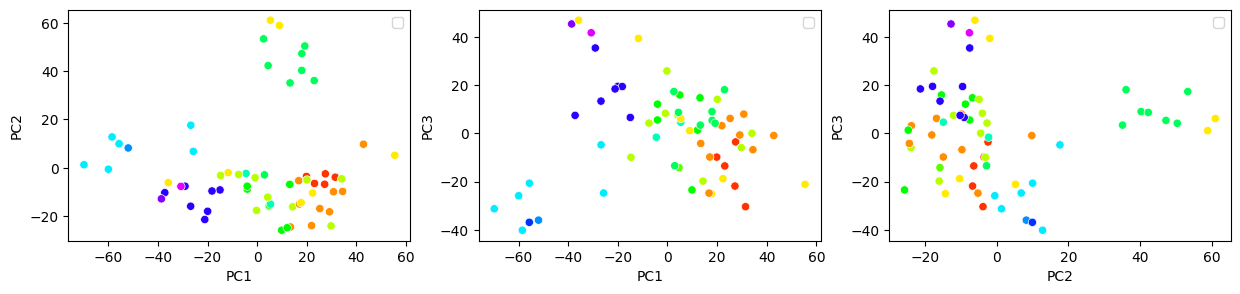

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 3))
plt.subplot(1, 3, 1)
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=nci_df['labs'], 
                palette=sns.color_palette('gist_rainbow', n_colors=labs_vc.shape[0]))
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend('')
plt.subplot(1, 3, 2)
sns.scatterplot(x=X[:, 0], y=X[:, 2], hue=nci_df['labs'], 
                palette=sns.color_palette('gist_rainbow', n_colors=labs_vc.shape[0]))
plt.xlabel('PC1')
plt.ylabel('PC3')
plt.legend('')
plt.subplot(1, 3, 3)
sns.scatterplot(x=X[:, 1], y=X[:, 2], hue=nci_df['labs'], 
                palette=sns.color_palette('gist_rainbow', n_colors=labs_vc.shape[0]))
plt.xlabel('PC2')
plt.ylabel('PC3')
plt.legend('')

* Μιας και είμαστε στο PCA, για να δούμε τα διαγράμματα με τα ποσοστά διακύμανσης.

* Βλέπουμε μια καμπή γύρω στην έβδομη κύρια συνιστώσα, όπου φτάνουμε στο 40% της διακύμανσης αθροιστικά.

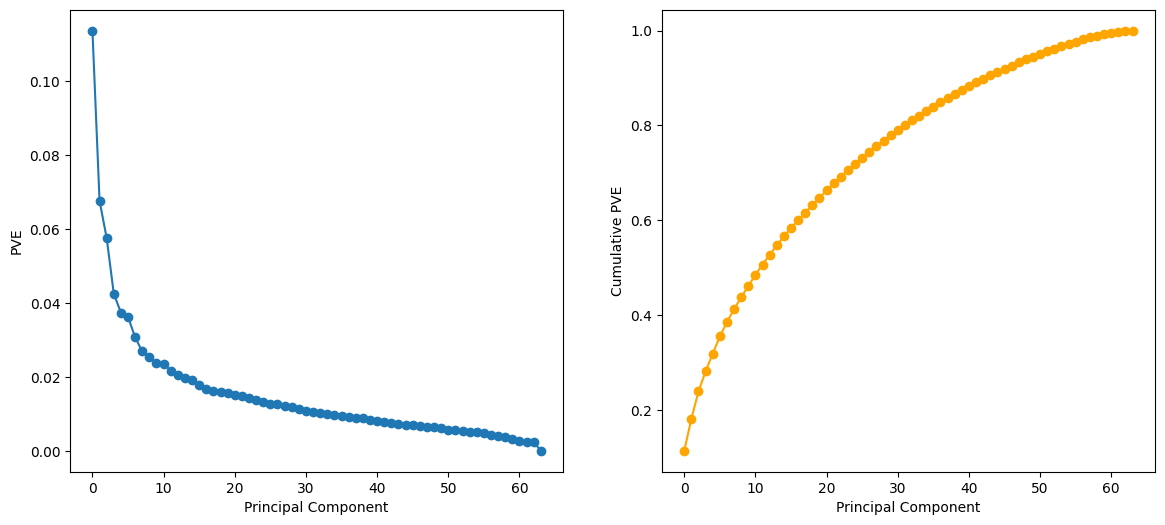

In [6]:
import numpy as np

plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.plot(pca.explained_variance_ratio_, marker='o')
plt.xlabel('Principal Component')
plt.ylabel('PVE')
plt.subplot(1, 2, 2)
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o', color='orange')
plt.xlabel('Principal Component')
_ = plt.ylabel('Cumulative PVE')

* Για την ιεραρχική συσταδοποίηση θα χρησιμοποιήσουμε το SciPy.

* Πρέπει να ορίσουμε την μετρική με την οποία μετράμε τη διαφορά (απόσταση) μεταξύ δύο συστάδων, ώστε να μπορούμε να βρούμε αυτές με την μικρότερη απόσταση μεταξύ τους.

* Αυτή η διαφορά ονομάζεται *διασύνδεση* (linkage).

* Στην *πλήρη* (complete) διασύνδεση, για δύο συστάδες $A$ και $B$ αποθηκεύουμε όλες τις ανά ζεύγη αποστάσεις μεταξύ των δειγμάτων στην $A$ και στη $B$ και χρησιμοποιούμε τη *μέγιστη* απόσταση ως τη διαφορά μεταξύ $A$ και $B$:

$$\max \,\{\,d(a,b):a\in A,\,b\in B\,\}$$

In [7]:
from scipy.cluster.hierarchy import dendrogram, linkage

cluster_model_complete = linkage(nci_scaled, 'complete')

* Αφού υπολογίσουμε τη διασύνδεση, μπορούμε να κατασκευάσουμε ένα *δενδρόγραμμα* (dendrogram) που μας δείχνει την ιεραρχική κατασκευή των συστάδων.

* Στο δενδρόγραμμα, το μήκος κάθε κλαδιού αντιστοιχεί στην απόσταση μεταξύ των δύο συστάδων που ενώνονται.

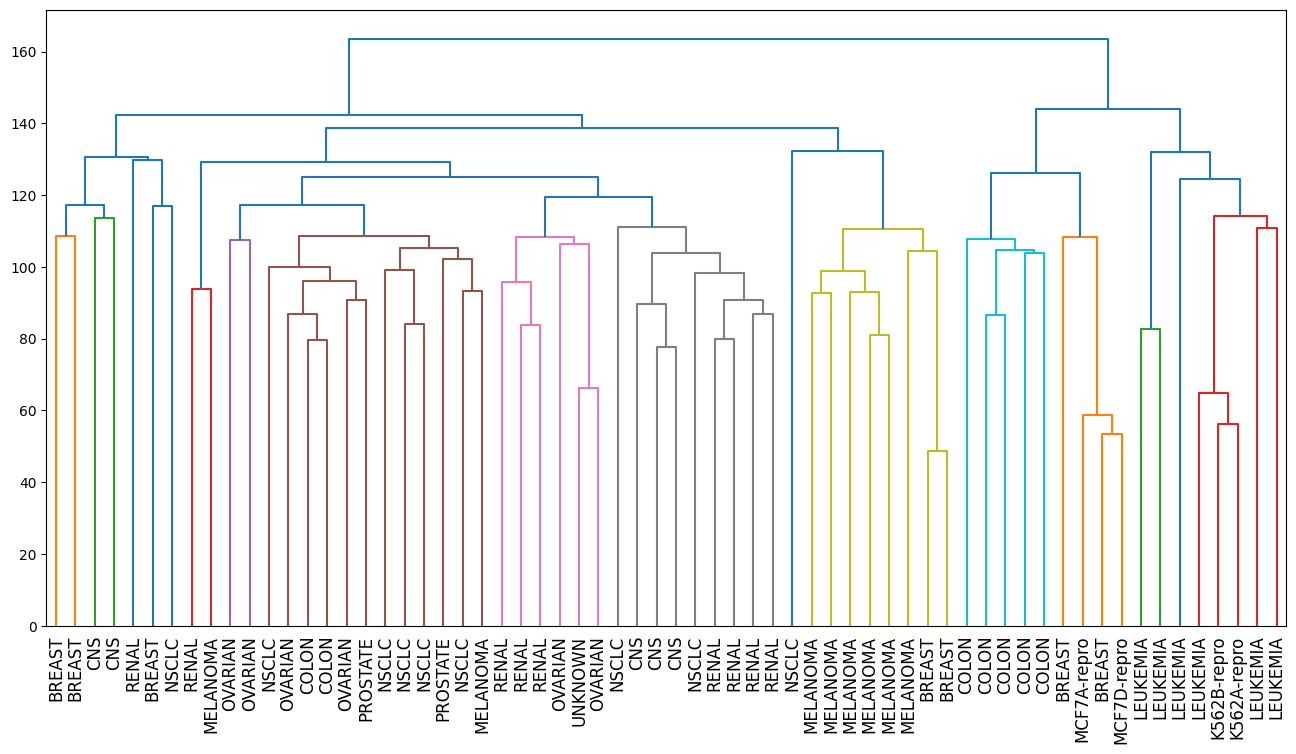

In [8]:
plt.figure(figsize=(16, 8))
_ = dendrogram(cluster_model_complete, orientation='top', labels=nci_df['labs'].values, leaf_font_size=12)

* Μια άλλη μέθοδος σύνδεσης είναι η *μέση* (average) σύνδεση.

* Υπολογίζουμε όλες τις αποστάσεις μεταξύ όλων των ζευγαριών δειγμάτων από τη συστάδα $A$ και $B$ και χρησιμοποιούμε τον *μέσο όρο* των αποστάσεων:

$$ {\frac {1}{|A|\cdot |B|}}\sum _{a\in A}\sum _{b\in B}d(a,b)$$

* Για να είμαστε πιο ακριβείς, η μέθοδος ονομάζεται *μέση σύνδεση άνευ βαρών* (unweighted average linkage), ή UPGMA.

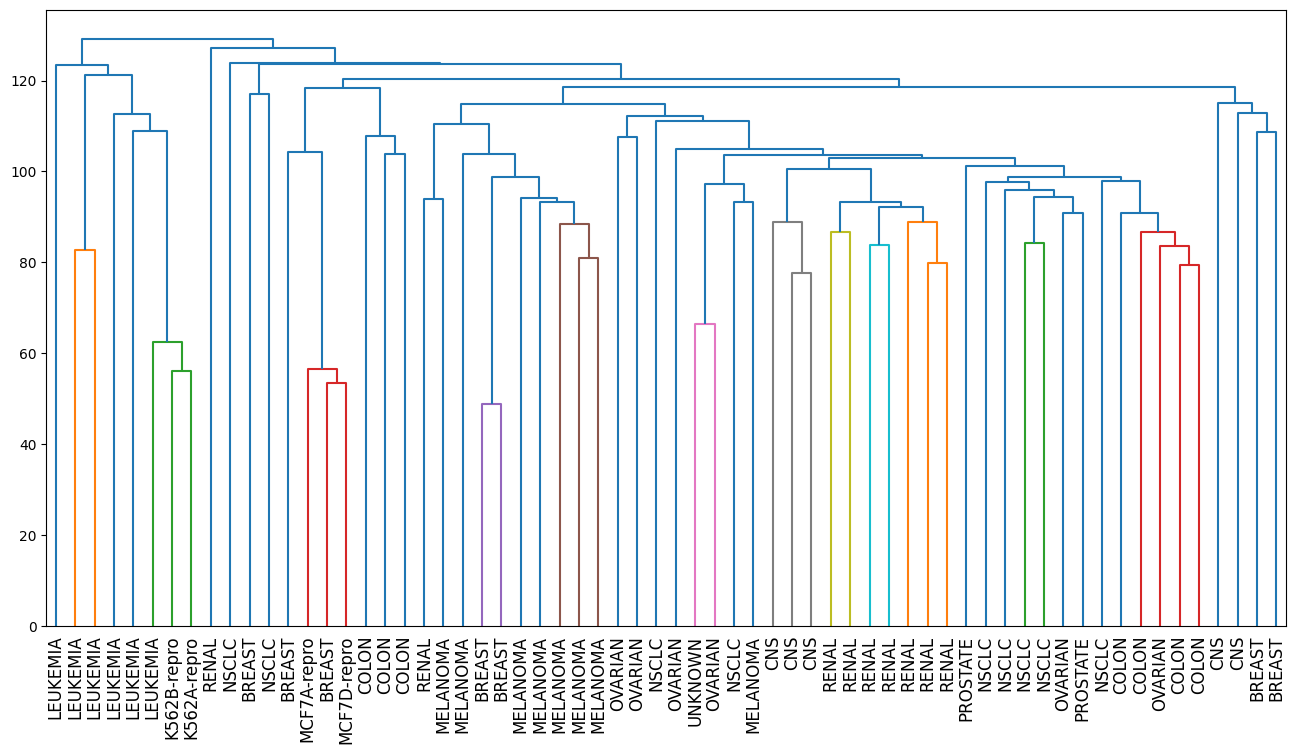

In [9]:
cluster_model_average = linkage(nci_scaled, method="average")
plt.figure(figsize=(16, 8))
_ = dendrogram(cluster_model_average, orientation='top', labels=nci_df['labs'].values, leaf_font_size=12)

* Μια ακόμα μέθοδος σύνδεσης είναι η *μοναδική* (single) διασύνδεση. 

* Υπολογίζουμε όλες τις αποστάσεις μεταξύ όλων των ζευγαριών δειγμάτων από τη συστάδα $A$ και $B$ και χρησιμοποιούμε τη μικρότερη απόσταση:

$$\min \,\{\,d(a,b):a\in A,\,b\in B\,\}$$

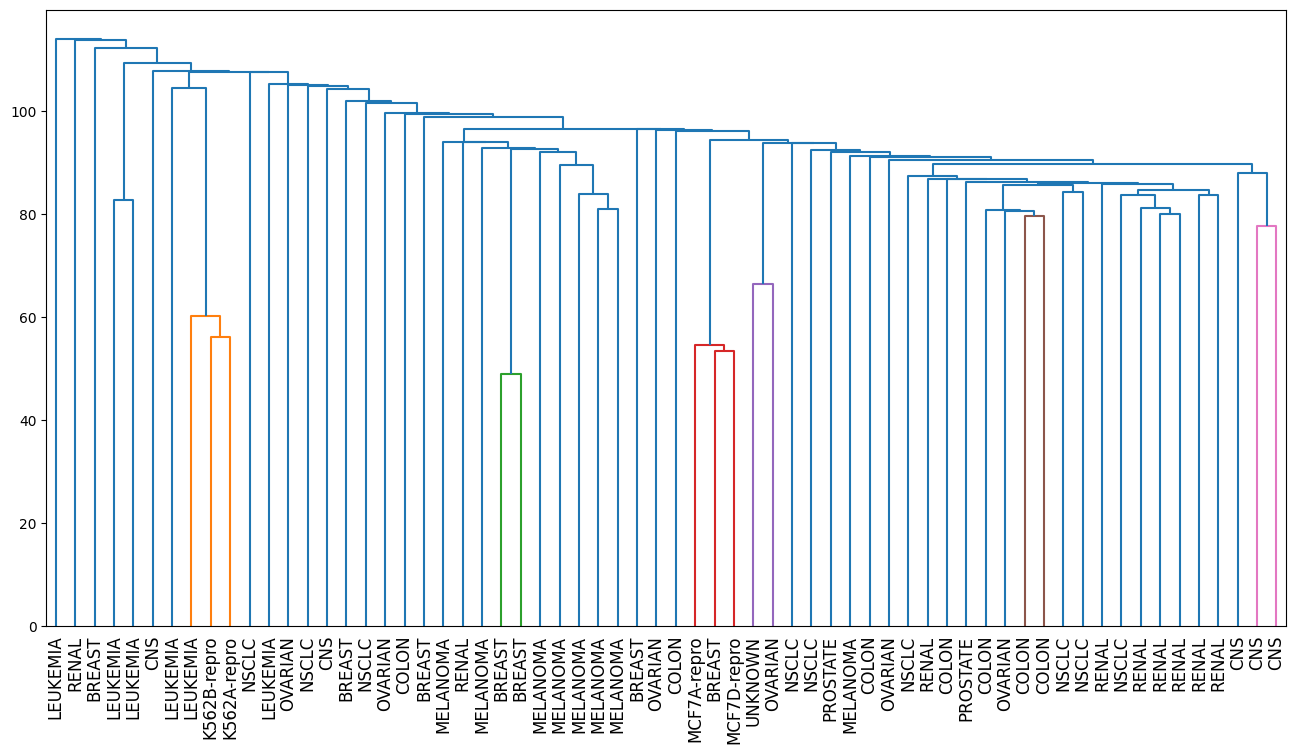

In [10]:
cluster_model_average = linkage(nci_scaled, method="single")
plt.figure(figsize=(16, 8))
_ = dendrogram(cluster_model_average, orientation='top', labels=nci_df['labs'].values, leaf_font_size=12)

* Έστω ότι θα χρησιμοποιήσουμε την πλήρη σύνδεση και θα κρατήσουμε τέσσερεις συστάδες.

* Μπορούμε να βρούμε τη συστάδα κάθε παρατήρησης χρησιμοποιώντας τη συνάρτηση`fcluster()`.

In [11]:
from scipy.cluster.hierarchy import fcluster

hc_labels = fcluster(cluster_model_complete, 4, criterion='maxclust')
hc_labels

array([2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 4, 4, 4, 4, 4, 2, 3, 2,
       3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2],
      dtype=int32)

* Θα βάλουμε τη συστάδα κάθε παρατήρησης, μαζί με τον τύπο του καρκίνου, σε ένα `DataFrame`.

In [12]:
import pandas as pd

labs_cluster_df = pd.DataFrame({'labs': nci_df['labs'], 'cluster': hc_labels})
labs_cluster_df

,labs,cluster
rownames,,
V1,CNS,2
V2,CNS,2
V3,CNS,2
V4,RENAL,2
V5,BREAST,1
...,...,...
V60,MELANOMA,2
V61,MELANOMA,2
V62,MELANOMA,2


* Τότε, με τη χρήση του `pivot_table()` μπορούμε να δούμε ποια είδη καρκίνου ενστάσσονται σε κάθε συστάδα.

* Για παράδειγμα, όλες οι περιπτώσεις λευχαιμίας είναι στη συστάδα 4.

* Οι περιπτώσεις του καρκίνου του μαστού εντάσσονται στις συστάδες 1, 2, 3.

In [13]:
labs_cluster_df.pivot_table(index='cluster', columns='labs', aggfunc='size').fillna(0)

labs,BREAST,CNS,COLON,K562A-repro,K562B-repro,LEUKEMIA,MCF7A-repro,MCF7D-repro,MELANOMA,NSCLC,OVARIAN,PROSTATE,RENAL,UNKNOWN
cluster,,,,,,,,,,,,,,
1,3.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,2.0,3.0,2.0,0.0,0.0,0.0,0.0,0.0,8.0,8.0,6.0,2.0,8.0,1.0
3,2.0,0.0,5.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,1.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


* Αν θέλουμε μια γραφική απεικόνιση των συστάδων, μπορούμε να τραβήξουμε μια οριζόντια γραμμή στο σημείο που σχηματίζονται οι τέσσερεις συστάδες.

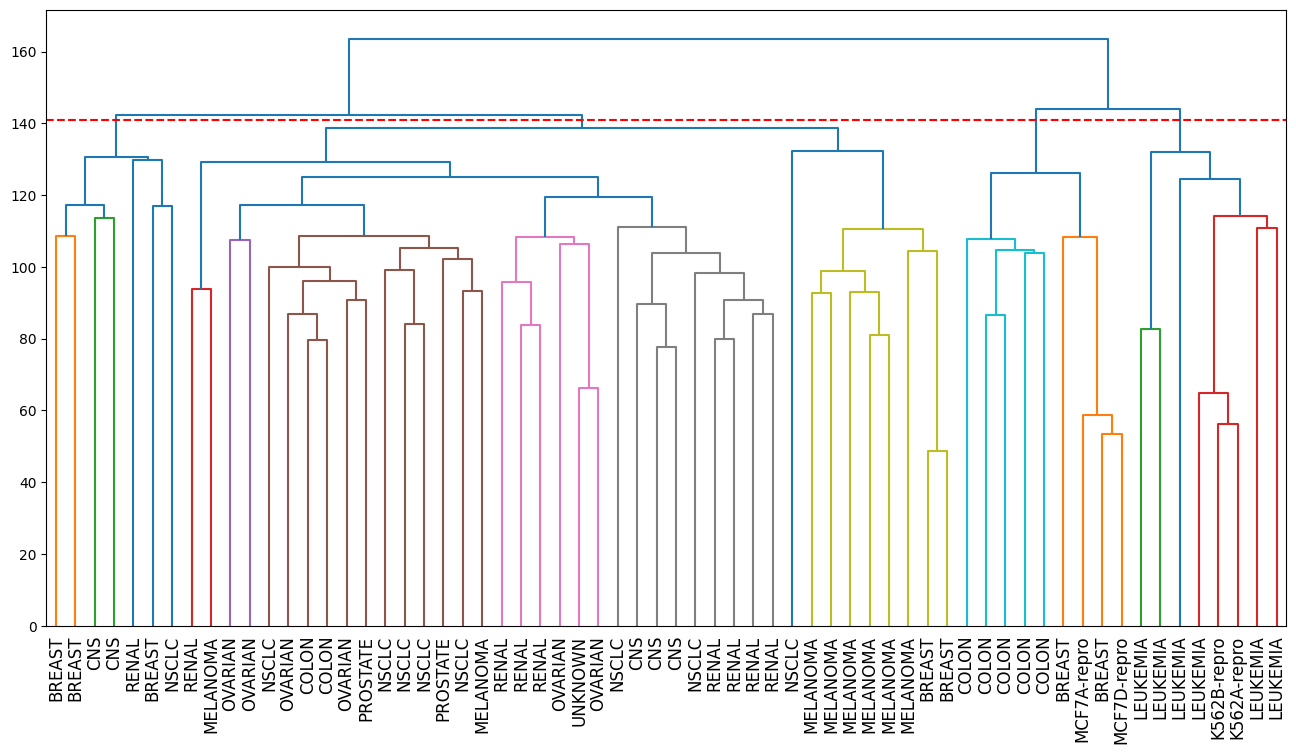

In [14]:
plt.figure(figsize=(16, 8))
_ = dendrogram(cluster_model_complete, orientation='top', labels=nci_df['labs'].values, leaf_font_size=12)
plt.axhline(y=141, color='r', linestyle='dashed')

* Έχει ενδιαφέρον να συγκρίνουμε τα αποτελέσματα με αυτά που θα παίρναμε αν χρησιμοποιούσαμε k-means.

In [15]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4, random_state=0, n_init=20)
km_labels = kmeans.fit_predict(nci_scaled)
km_labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 1, 2, 1, 2, 2, 1, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3],
      dtype=int32)

* Επειδή τα ονόματα των συστάδων εδώ ξεκινούν από το 0, τους προσθέτουμε 1 ώστε να έχουν το ίδιο πεδίο ονομάτων με την ιεραρχική συσταδοποίηση.

* Αυτό δεν σημαίνει ότι συνώνυμες συστάδες είναι ίδιες!

In [16]:
km_labels += 1
km_labels

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 3, 2, 3, 2, 3, 3, 2, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 4, 4, 4, 4, 4, 4, 4, 4, 4],
      dtype=int32)

* Για να βρούμε ακριβώς την αντιστοιχία των συστάδων, μπορούμε να φτιάξουμε έναν *πίνακα διασταύρωσης* (cross tabulation table).

In [17]:
pd.crosstab(hc_labels, km_labels, rownames=['hc'], colnames=['kmeans'])

kmeans,1,2,3,4
hc,,,,
1,0,7,0,0
2,1,20,10,9
3,0,0,9,0
4,8,0,0,0


* Όλα τα μέλη της συστάδας 1 από την ιεραρχική συσταδοποίηση ανήκουν στη συστάδα 2 της k-means.

* Όλα τα μέλη της συστάδας 3 από την ιεραρχική συσταδοποίηση ανήκουν στη συστάδα 3 της k-means.

* Όλα τα μέλη της συστάδας 4 από την ιεραρχική συσταδοποίηση ανήκουν στη συστάδα 1 της k-means.